Medical Insurance Costs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder,MinMaxScaler

from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression


Reading the data

In [2]:
data="insurance.csv"
df=pd.read_csv(data)

Performing EDA

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.shape

# print(df.describe())
# print(df.shape)
# # print(df.isnull().sum())
# print(df.columns)
# # print(df.count)
# print(df.info)
# print(df.dtypes) 

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:

#يُستخدم لحساب عدد القيم الفريدة (unique values) في كل عمود من DataFrame
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

يحسب معامل الارتباط بيرسون (Pearson correlation) بين الأعمدة الرقمية فقط.



In [8]:
df.corr(numeric_only=True)['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

| العمود     | معامل الارتباط | التفسير                                                                                                     |
| ---------- | -------------- | ----------------------------------------------------------------------------------------------------------- |
| `age`      | 0.299          | **ارتباط إيجابي متوسط** — كلما زاد العمر، زادت التكلفة الطبية المتوقعة.                                     |
| `bmi`      | 0.198          | **ارتباط إيجابي ضعيف إلى متوسط** — زيادة مؤشر كتلة الجسم قد تعني مخاطر صحية أعلى وبالتالي تكلفة تأمين أعلى. |
| `children` | 0.068          | **ارتباط ضعيف جدًا** — عدد الأطفال ليس له تأثير قوي على تكلفة التأمين.                                      |
| `charges`  | 1.000          | ارتباط تام مع نفسه (طبيعي).                                                                                 |


<Axes: xlabel='age', ylabel='Density'>

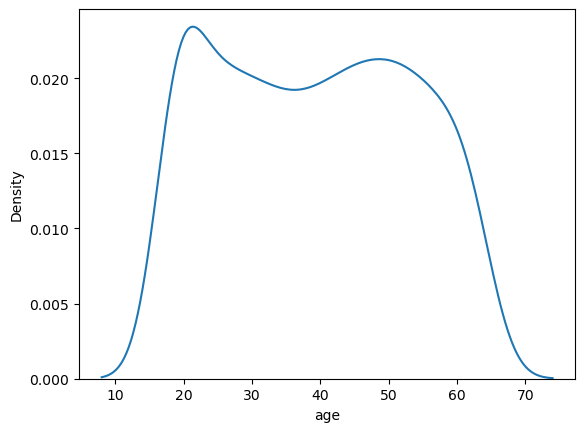

In [9]:
# الغرض من هذا الكود هو فهم التركيبة العمرية للأفراد في مجموعة بيانات تكلفة التأمين.
sns.kdeplot(df['age'])

<Axes: xlabel='sex', ylabel='count'>

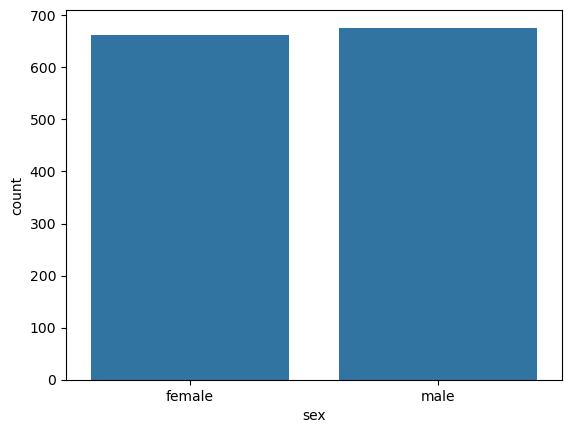

In [10]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='bmi', ylabel='Density'>

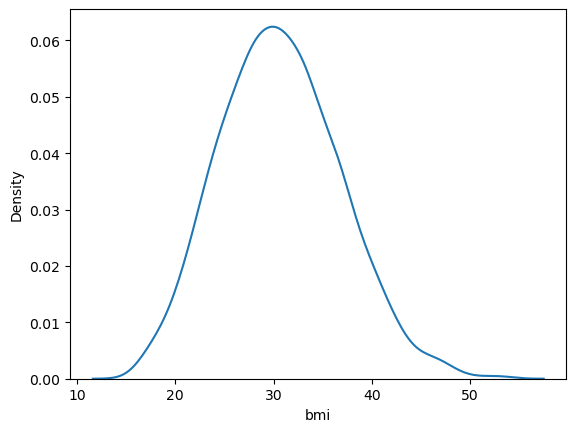

In [11]:
#الهدف من هذا الرسم البياني هو فهم كيف تتوزع قيم مؤشر كتلة الجسم بين الأفراد في مجموعة البيانات. من خلال هذا الرسم، يمكنك 
sns.kdeplot(df['bmi'])

<Axes: xlabel='children', ylabel='count'>

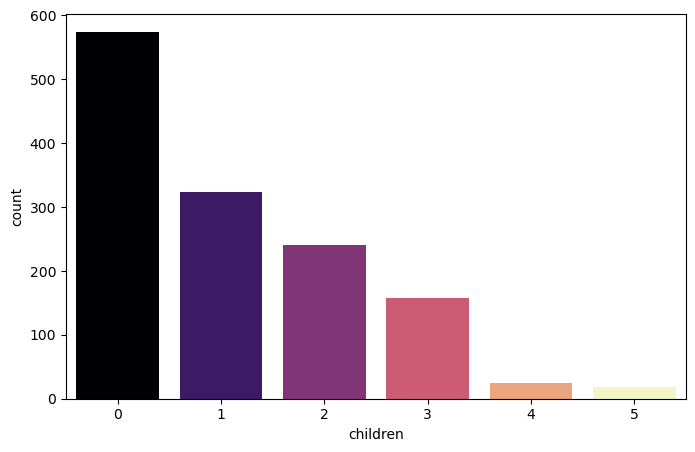

In [12]:
# لهدف الأساسي من هذا الرسم البياني هو فهم التركيبة الأسرية لمجموعة البيانات من حيث عدد الأطفال. يمكنك من خلاله معرفة:

# العدد الأكثر شيوعًا للأطفال بين المؤمن عليهم.

# نسبة الأشخاص الذين ليس لديهم أطفال.

# نسبة الأشخاص الذين لديهم عدد كبير من الأطفال.

plt.figure(figsize=(8, 5))
sns.countplot(x='children', data=df, hue='children', palette='magma', legend=False)

الاستنتاجات من ارتفاع الأعمدة:

أغلبية كبيرة من الأفراد ليس لديهم أطفال (0 طفل): الشريط البنفسجي الداكن لـ '0' هو الأطول بكثير، حيث يتجاوز 550 شخصًا.

الفئة الثانية الأكثر شيوعًا هي '1 طفل': حوالي 320 شخصًا لديهم طفل واحد.

الفئة الثالثة هي '2 طفل': حوالي 240 شخصًا لديهم طفلان.

تناقص تدريجي: نلاحظ انخفاضًا حادًا في عدد الأشخاص مع زيادة عدد الأطفال. عدد قليل جدًا لديهم 4 أو 5 أطفال.

<Axes: xlabel='smoker', ylabel='count'>

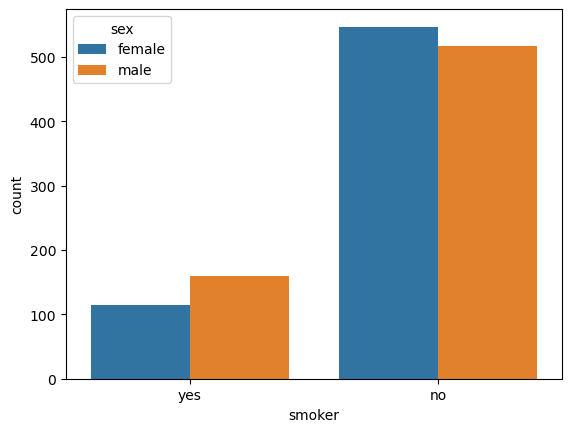

In [13]:
sns.countplot(x='smoker',data=df,hue='sex')

C:\Users\mahdi\AppData\Local\Temp\ipykernel_24600\3266160496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df,palette='viridis')


<Axes: xlabel='region', ylabel='count'>

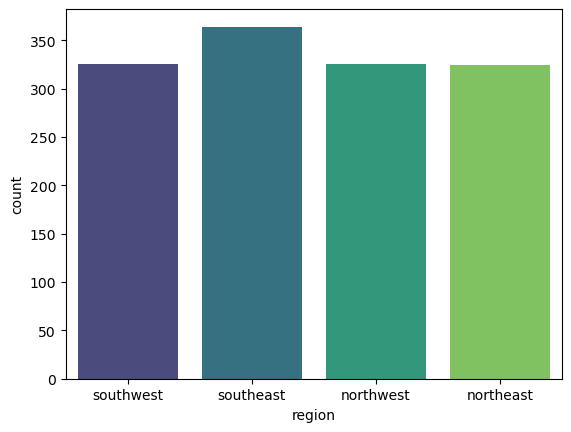

In [14]:
sns.countplot(x='region', data=df,palette='viridis')

C:\Users\mahdi\AppData\Local\Temp\ipykernel_24600\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

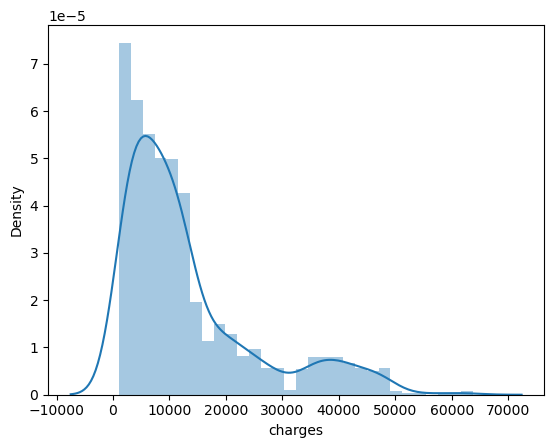

In [15]:
sns.distplot(df['charges'])

In [16]:
X=df.drop(columns=['charges'])
y=df['charges']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Encoding Categorical Columns

we have 3 categorical columns sex, smoker and region so i encoded them using OHE we can also use pd.get_dummies().
ترميز الأعمدة الفئوية

لدينا 3 أعمدة فئوية وهي: sex و smoker و region، لذلك قمتُ بترميزها باستخدام الترميز أحادي القيمة (One-Hot Encoding).
يمكننا أيضًا استخدام الدالة pd.get_dummies() لتحقيق نفس الغرض.

In [18]:
ohe=OneHotEncoder(sparse_output=False)
ohe.fit(X_train[['sex','smoker','region']])
encoded_columns = ohe.get_feature_names_out(['sex', 'smoker', 'region'])
X_train_encoded=pd.DataFrame(ohe.transform(X_train[['sex','smoker','region']]), columns=encoded_columns, index=X_train.index)
X_test_encoded=pd.DataFrame(ohe.transform(X_test[['sex','smoker','region']]), columns=encoded_columns, index=X_test.index)
X_train_final=pd.concat([X_train.drop(columns=['smoker','sex','region']), X_train_encoded], axis=1)
X_test_final=pd.concat([X_test.drop(columns=['smoker','sex','region']), X_test_encoded], axis=1)

In [19]:
X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
882,21,22.135,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
505,37,30.875,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
798,58,33.100,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
792,22,23.180,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
201,48,32.230,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X_train_final.isna().sum()

age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

Scaling the Data

as our data is normally distributed I first scaled with Standardscaler

In [21]:
st=StandardScaler()
X_train_scaled=st.fit_transform(X_train_final)
X_test_scaled=st.transform(X_test_final)

In [22]:

lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(X_test_scaled)

Accuracy on testing Data

As we are using LinearRegression our accauracy is not that bad according to it, but we can improve it if we use some complex models like XGBoostregressor

In [24]:
r2_score(y_test, y_pred)

0.7449415564623687

كنتُ فقط أتحقق مما إذا كان هناك أي فرق في الدقة بين تقنيتي التحجيم: StandardScaler و MinMaxScaler.

In [25]:
scaler1=MinMaxScaler()
X_train_scaled1=scaler1.fit_transform(X_train_final)
X_test_scaled1=scaler1.transform(X_test_final)

In [26]:

lr1=LinearRegression()
lr1.fit(X_train_scaled1,y_train)

LinearRegression()

In [27]:
y_pred1=lr1.predict(X_test_scaled)

Accuracy is same in this case but not always.

In [28]:
r2_score(y_test,y_pred)

0.7449415564623687

In [29]:
import pandas as pd

# بيانات جديدة خامة بنفس الأعمدة
test_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [29.5],
    'children': [0],
    'smoker': ['no'],
    'region': ['southeast']
})

# التوقع باستخدام النموذج المدرب كاملاً (بما فيه preprocessing و polynomial)
# ترميز البيانات الجديدة
encoded_test = pd.DataFrame(ohe.transform(test_data[['sex', 'smoker', 'region']]),
                            columns=encoded_columns)

# دمج الأعمدة الرقمية مع الأعمدة المرمّزة
test_data_num = test_data.drop(columns=['sex', 'smoker', 'region']).reset_index(drop=True)
test_data_final = pd.concat([test_data_num, encoded_test], axis=1)

# تحجيم
test_data_scaled = st.transform(test_data_final)

# التنبؤ
predicted_cost = lr.predict(test_data_scaled)[0]


print(" التكلفة المتوقعة بالدولار:", predicted_cost)
print(" التكلفة بالريال اليمني:", f"{predicted_cost * 600:,.0f} ريال")


 التكلفة المتوقعة بالدولار: 4774.1795490960485
 التكلفة بالريال اليمني: 2,864,508 ريال


In [30]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)


# Visualization Functions

In [31]:

def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, color='navy')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"outputs/plots/{title.replace(' ', '_').lower()}.png")
    plt.show()

def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True, color='darkorange')
    plt.title(title)
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.tight_layout()
    plt.savefig(f"outputs/plots/{title.replace(' ', '_').lower()}.png")
    plt.show()

def plot_distribution_comparison(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(y_true, label='Actual', fill=True, color='green')
    sns.kdeplot(y_pred, label='Predicted', fill=True, color='blue')
    plt.title(title)
    plt.xlabel("Charges")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"outputs/plots//{title.replace(' ', '_').lower()}.png")
    plt.show()
    
   

# Apply Visualizations

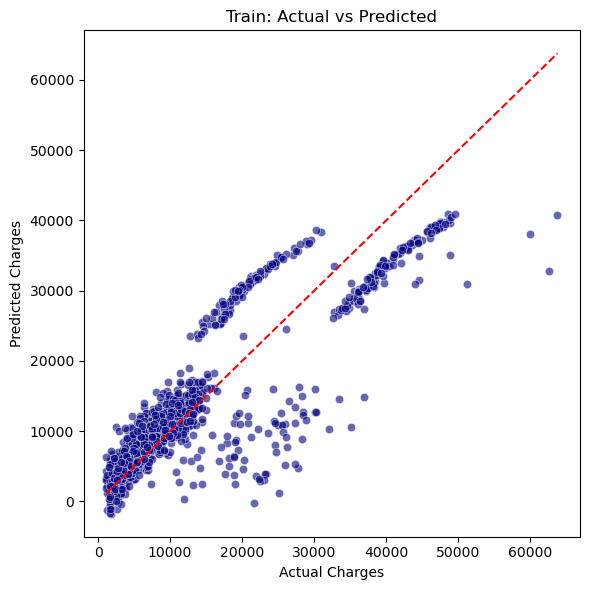

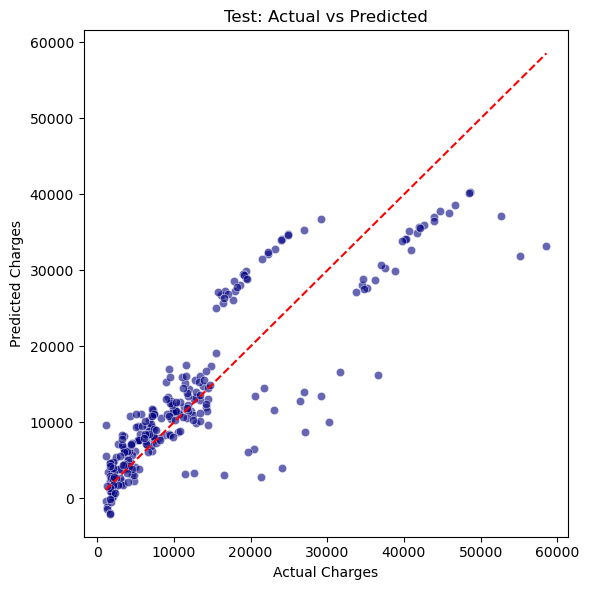

In [32]:

plot_actual_vs_pred(y_train, y_train_pred, "Train: Actual vs Predicted")
plot_actual_vs_pred(y_test, y_test_pred, "Test: Actual vs Predicted")

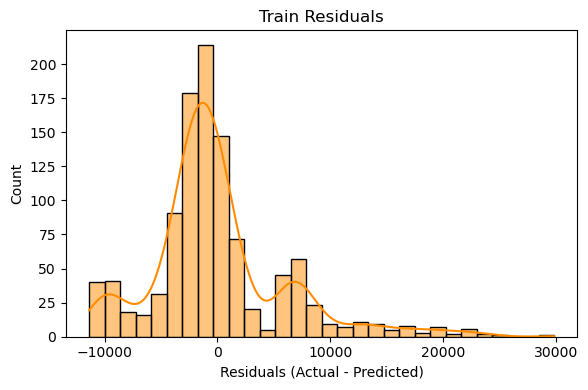

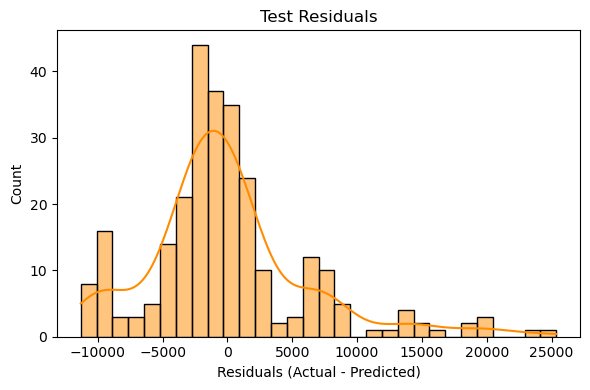

In [33]:

plot_residuals(y_train, y_train_pred, "Train Residuals")
plot_residuals(y_test, y_test_pred, "Test Residuals")

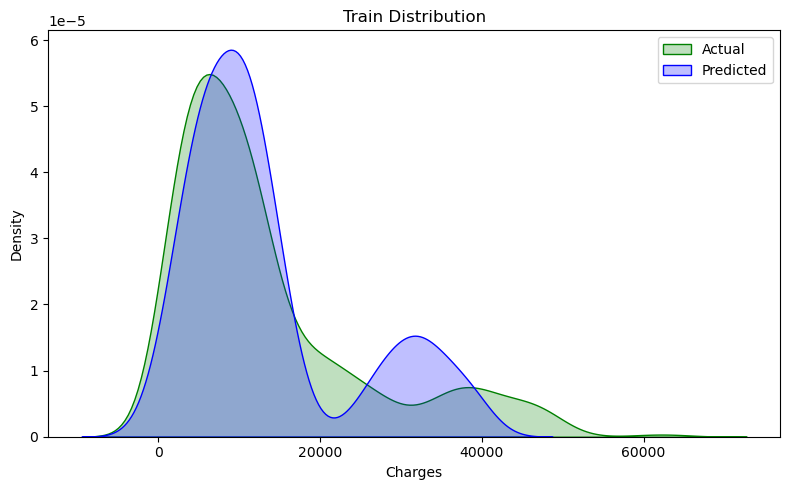

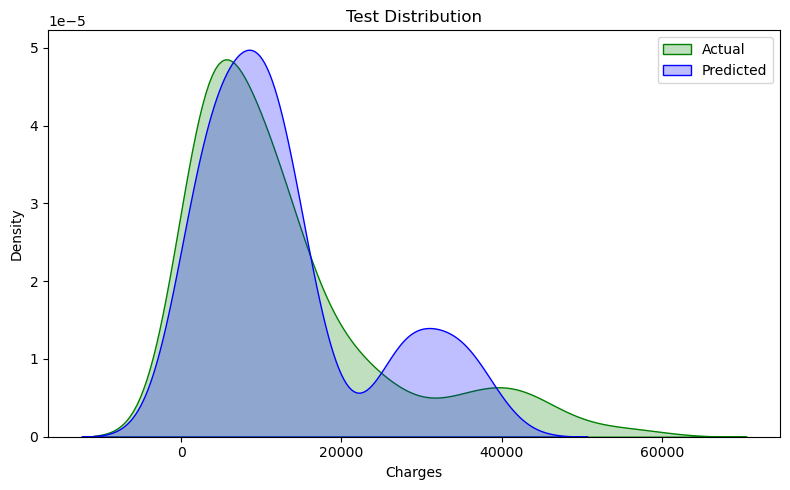

In [34]:


plot_distribution_comparison(y_train, y_train_pred, "Train Distribution")
plot_distribution_comparison(y_test, y_test_pred, "Test Distribution")


In [35]:
import joblib

# نفترض أن grid_search هو نموذجك بعد التدريب
joblib.dump(lr, 'outputs/model_joblib.pkl')
print("Model saved successfully!")


Model saved successfully!
